In [1]:
import warnings
import pandas as pd
import numpy as np
import glob
import cv2
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import *

In [2]:
imgs=glob.glob(r"C:\Users\goura\OneDrive\Documents\Handwritten_Recognization_Datasets\Img\*")
df = pd.read_csv(r"C:\Users\goura\OneDrive\Documents\Handwritten_Recognization_Datasets\english.csv")
df.head(6)

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
5,Img/img001-006.png,0


In [3]:
print(df.head(6))
new_imgs = sorted(imgs)

labels = df['label'].tolist()

new_data = []
for i in new_imgs:
    img = cv2.imread(i, 1)
    
    if img is None:
        print(f"Failed to load image: {i}")
        continue
    img = cv2.resize(img, (64, 64))
    new_data.append(img)
    
new_data = np.array(new_data)
print(f"Total images found: {len(new_imgs)}")
print(f"Total images loaded successfully: {len(new_data)}")

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0
5  Img/img001-006.png     0
Total images found: 3410
Total images loaded successfully: 3410


In [4]:
labels = np.array(labels)
Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

In [5]:
train_images, test_images, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Model Building

In [7]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20,validation_split = 0.2)

Epoch 1/20
69/69 [==============================] - 473s 7s/step - loss: 4.2100 - accuracy: 0.0137 - val_loss: 4.1913 - val_accuracy: 0.0092
Epoch 2/20
69/69 [==============================] - 401s 6s/step - loss: 3.8590 - accuracy: 0.0720 - val_loss: 3.4693 - val_accuracy: 0.1264
Epoch 3/20
69/69 [==============================] - 473s 7s/step - loss: 3.1622 - accuracy: 0.1421 - val_loss: 3.0107 - val_accuracy: 0.1410
Epoch 4/20
69/69 [==============================] - 391s 6s/step - loss: 2.7707 - accuracy: 0.2223 - val_loss: 2.6910 - val_accuracy: 0.2253
Epoch 5/20
69/69 [==============================] - 147s 2s/step - loss: 2.4194 - accuracy: 0.2997 - val_loss: 2.4231 - val_accuracy: 0.2802
Epoch 6/20
69/69 [==============================] - 165s 2s/step - loss: 2.1141 - accuracy: 0.3758 - val_loss: 2.2237 - val_accuracy: 0.3553
Epoch 7/20
69/69 [==============================] - 150s 2s/step - loss: 1.8146 - accuracy: 0.4482 - val_loss: 2.0038 - val_accuracy: 0.4267
Epoch 8/20
69

# Model Evaluation

In [8]:
model.evaluate(test_images,test_labels)

22/22 [==============================] - 9s 409ms/step - loss: 1.2518 - accuracy: 0.6730


[1.2517917156219482, 0.6730205416679382]

# Predictions

In [9]:
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 [==============================] - 10s 423ms/step
Accuracy: 0.6730205278592375
Precision: 0.719991909600759
Recall: 0.6730205278592375
F1 Score: 0.6681784777052905
Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 1 ... 8 0 1]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 5]]


# Visualization

In [10]:
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.719991909600759
Recall: 0.6730205278592375


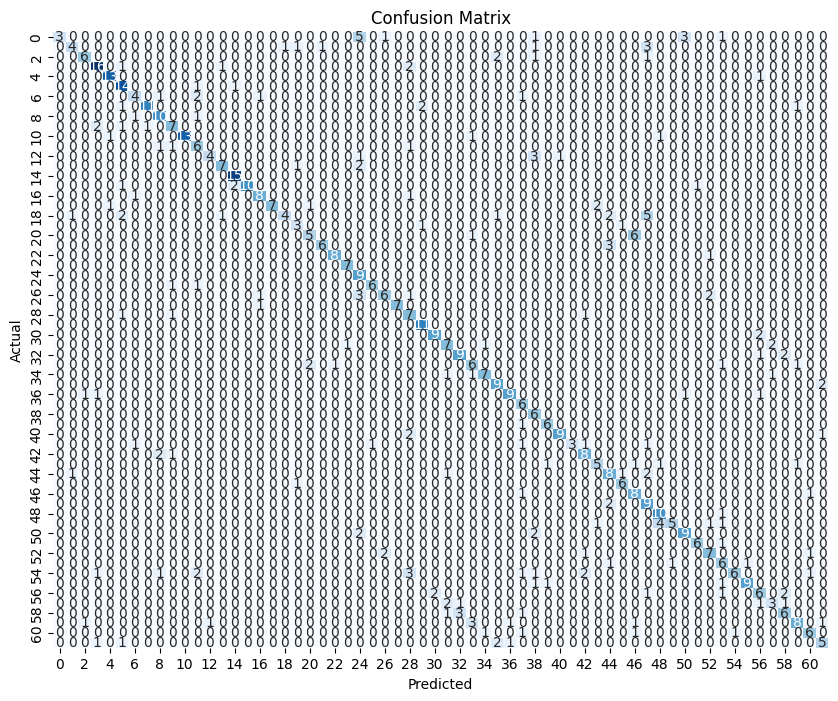

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1/1 [==============================] - 0s 163ms/step


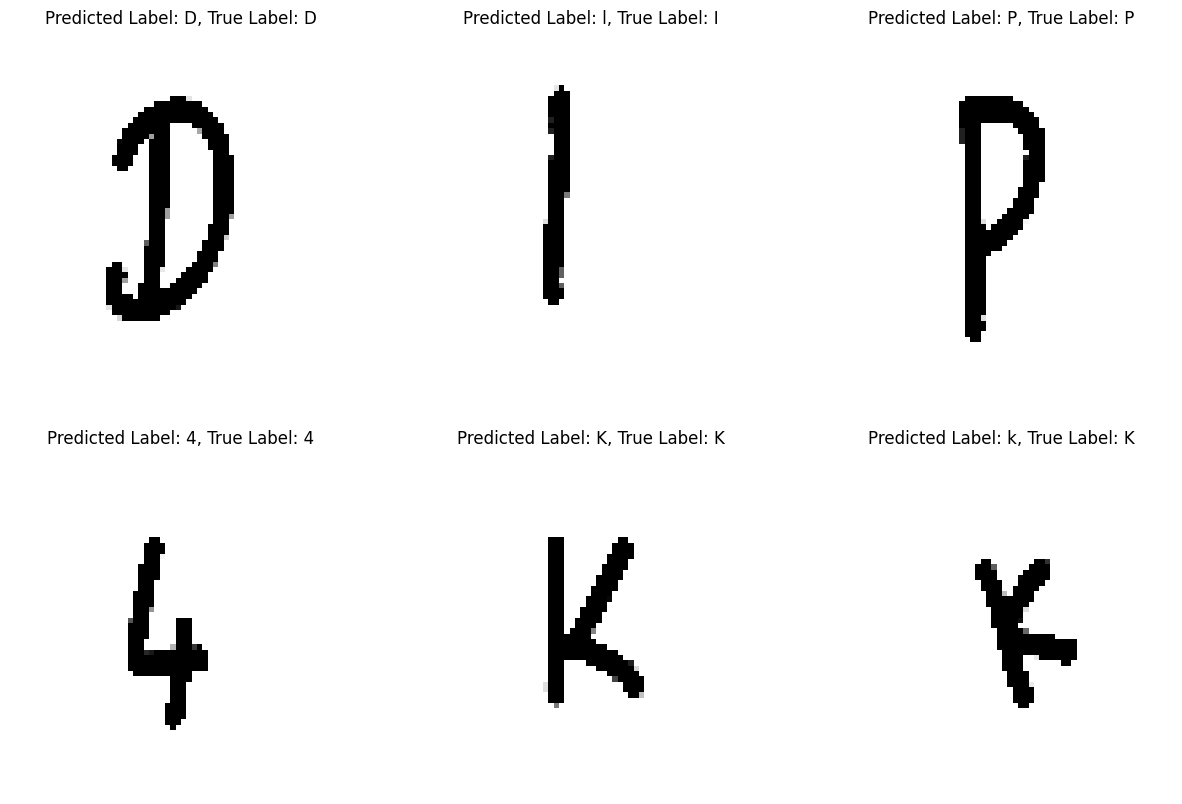

In [12]:
import random

random_indices = random.sample(range(len(test_images)), 6)

y_pred_probs = model.predict(test_images[random_indices])
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_pred_labels_decoded = Encoder.inverse_transform(y_pred_labels)

y_true_labels_decoded = Encoder.inverse_transform(test_labels[random_indices])
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[idx])
    plt.title(f'Predicted Label: {y_pred_labels_decoded[i]}, True Label: {y_true_labels_decoded[i]}')
    plt.axis('off')
plt.show()

# Image Preprocessing and Prediction

1/1 [==============================] - 0s 107ms/step
Predicted Label for new image: 9


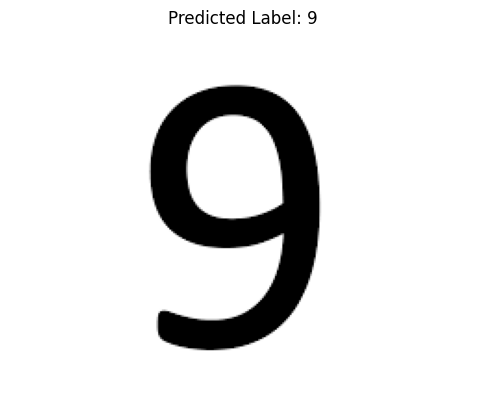

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to process the image before prediction
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.reshape(img, (1, 64, 64, 3))
    return img
    
new_image_path = r"C:\Users\goura\Downloads\Number.png"
new_image = preprocess_image(new_image_path)

prediction = model.predict(new_image)

predicted_label = np.argmax(prediction, axis=1)

predicted_class = Encoder.inverse_transform(predicted_label)

print(f'Predicted Label for new image: {predicted_class[0]}')

original_image = cv2.imread(new_image_path)

original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(original_image_rgb)
plt.title(f'Predicted Label: {predicted_class[0]}')
plt.axis('off')  # Hide the axis
plt.show()

In [29]:
model.save(r'C:\Users\goura\OneDrive\Documents\Handwritten_Recognization_Datasets\my_trained_model.h5')

In [31]:
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\goura\OneDrive\Documents\Handwritten_Recognization_Datasets\my_trained_model.h5')

# File text Prediction

Loaded CSV file: C:/Users/goura/OneDrive/Desktop/New_data.csv


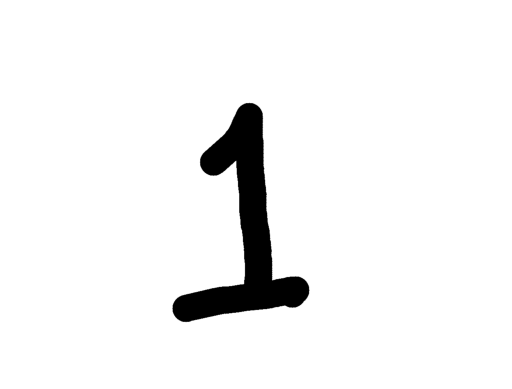

1/1 [==============================] - 0s 130ms/step
Predicted label: 1 (from image: C:/Users/goura/OneDrive/Documents/Handwritten_Recognization_Datasets/Img/img002-017.png)
Predicted text: This is my Model


In [50]:
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tkinter import filedialog
from tkinter import Tk
from PIL import Image
import matplotlib.pyplot as plt

model = load_model(r'C:\Users\goura\OneDrive\Documents\Handwritten_Recognization_Datasets\my_trained_model.h5')

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = img / 
    img = np.reshape(img, (1, 64, 64, 3)) 
    return img

def load_csv_file():
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select CSV file", filetypes=[("CSV files", "*.csv")])
    df = pd.read_csv(file_path)
    print(f"Loaded CSV file: {file_path}")
    return df

def select_and_predict_image():
    root = Tk()
    root.withdraw()
    img_path = filedialog.askopenfilename(title="Select Image file", filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
    
    img_display = Image.open(img_path)
    plt.imshow(img_display)
    plt.axis('off')  # Hide axes
    plt.show()
    
    # Preprocess image
    new_image = preprocess_image(img_path)
    
    # Predict using the model
    prediction = model.predict(new_image)
    
    predicted_label = np.argmax(prediction, axis=1)
    
    print(f"Predicted label: {predicted_label[0]} (from image: {img_path})")
    
    return predicted_label

def match_label_with_text(predicted_label, df):
    matched_text = df[df['label'] == predicted_label[0]]['text'].values
    return matched_text[0] if len(matched_text) > 0 else "No matching text found."

if __name__ == "__main__":
    csv_df = load_csv_file()
    
    predicted_label = select_and_predict_image()
    predicted_text = match_label_with_text(predicted_label, csv_df)
    print(f"Predicted text: {predicted_text}")

# Model Created